# Image Representation
Raster images are represented as matrices of pixels.

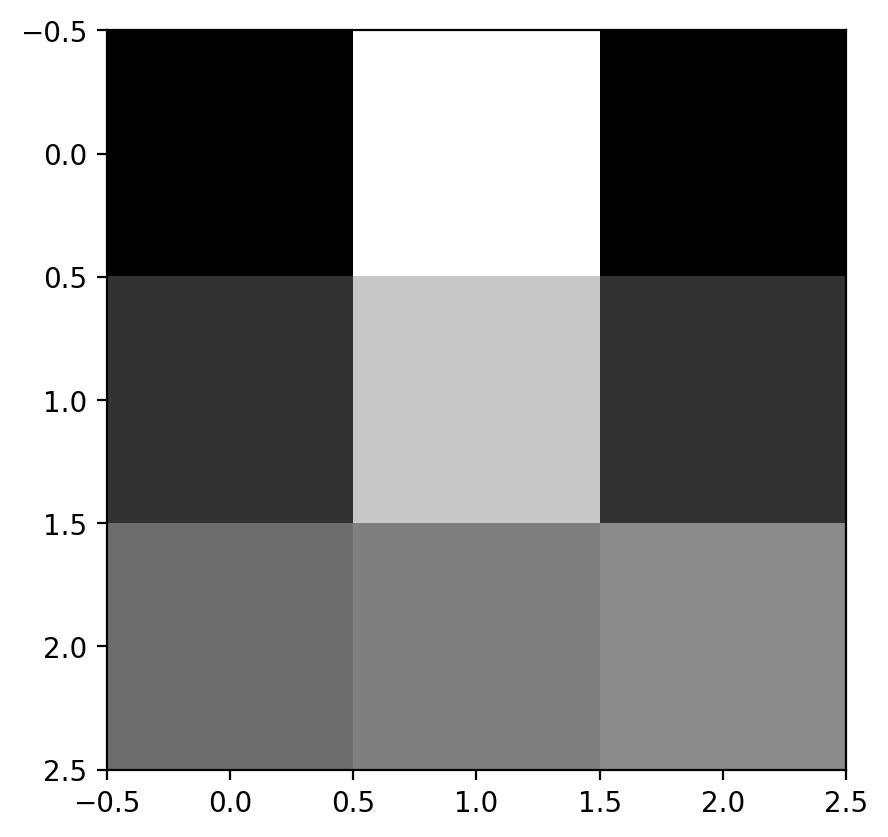

In [1]:
# Let's create a simple 3x3 Grayscale image.
# Each pixel is a number (0-255) representing intensity.

import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = 'retina'


img = np.array([[   0, 255,   0],   #   black,  white,     black
                [  50, 200,  50],   #    dark,  light,      dark
                [ 110, 127, 140]])  # mid-dark,   mid, mid-light

plt.imshow(img, cmap='gray')

In [2]:
# This is how it looks in a text representation

print(img)
type(img[0,0])

[[  0 255   0]
 [ 50 200  50]
 [110 127 140]]


numpy.int32

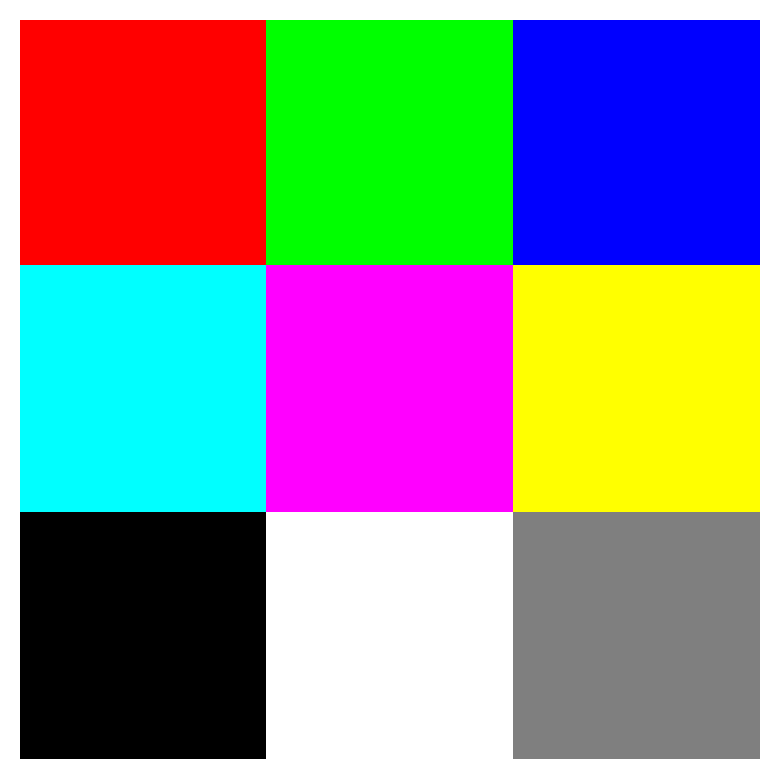

In [3]:
# Now let's create a simple 3x3 RGB image.
# This time each pixel is an [R,G,B] triad.

img1 = np.array([[[255,   0,   0], [  0, 255,   0], [  0,   0, 255]],   #   red,   green,     blue
                [[  0, 255, 255], [255,   0, 255], [255, 255,   0]],   #  cyan, magenta,   yellow
                [[  0,   0,   0], [255, 255, 255], [127, 127, 127]]])  # black,   white, gray 50%
plt.axis("off")
plt.imshow(img1)

In [4]:
# This is how it looks in a text representation

print(img1)
type(img1[0,0,0])

[[[255   0   0]
  [  0 255   0]
  [  0   0 255]]

 [[  0 255 255]
  [255   0 255]
  [255 255   0]]

 [[  0   0   0]
  [255 255 255]
  [127 127 127]]]


numpy.int32

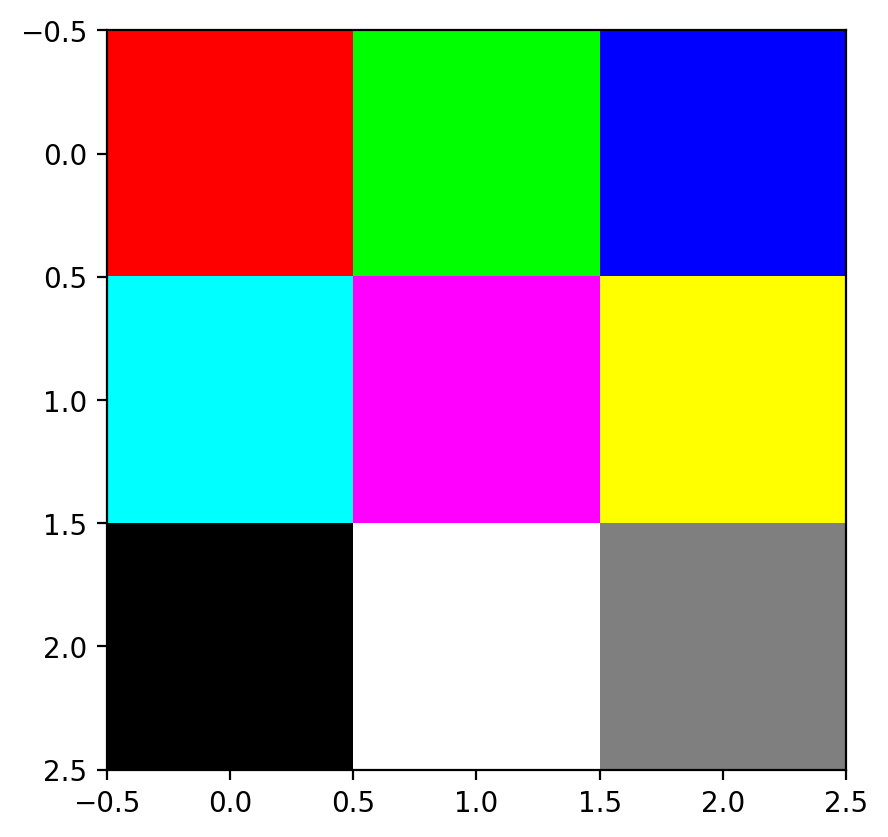

In [5]:
# Now let's create the same image with floating point numbers.

img2 = np.array([[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]],    #  red,   green,     blue
                [[0.0, 1.0, 1.0], [1.0, 0.0, 1.0], [1.0, 1.0, 0.0]],    # cyan, magenta,   yellow
                [[0.0, 0.0, 0.0], [1.0, 1.0, 1.0], [0.5, 0.5, 0.5]]])  # black,   white, gray 50%
plt.imshow(img2)

In [6]:
# This is how it looks in a text representation

print(img2)
type(img2[0,0,0])

[[[1.  0.  0. ]
  [0.  1.  0. ]
  [0.  0.  1. ]]

 [[0.  1.  1. ]
  [1.  0.  1. ]
  [1.  1.  0. ]]

 [[0.  0.  0. ]
  [1.  1.  1. ]
  [0.5 0.5 0.5]]]


numpy.float64

# Color Encoding
Color may be encoded in a variety of ways like RGB, RGBA, CMYK, or HSL. We'll use RGB encoding, where each pixel is represented as a vector with 3 channels: Red, Green, and Blue. RGB is usually encoded as a 24-bit bitmap, meaning that each pixel takes up 24 bits, or 3 bytes. Each byte represents a color channel, so every value must be an unsigned number between 0 and 255, where 0 means 0% intensity of its color, and 255 means 100% intensity.

Let's play with some colors.

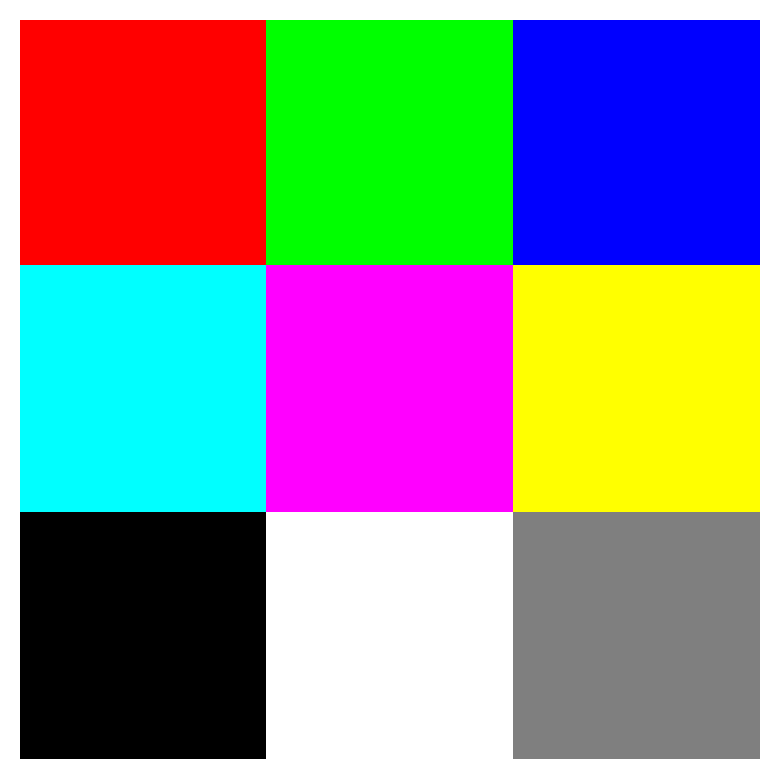

In [7]:
# First, let's create a simple 3x3 image



img3 = np.array([[[255,   0,   0], [  0, 255,   0], [  0,   0, 255]],   #  red,   green,     blue
                [[  0, 255, 255], [255,   0, 255], [255, 255,   0]],   # cyan, magenta,   yellow
                [[  0,   0,   0], [255, 255, 255], [127, 127, 127]]])  #black,   white, gray 50%
plt.axis("off")
plt.imshow(img3)

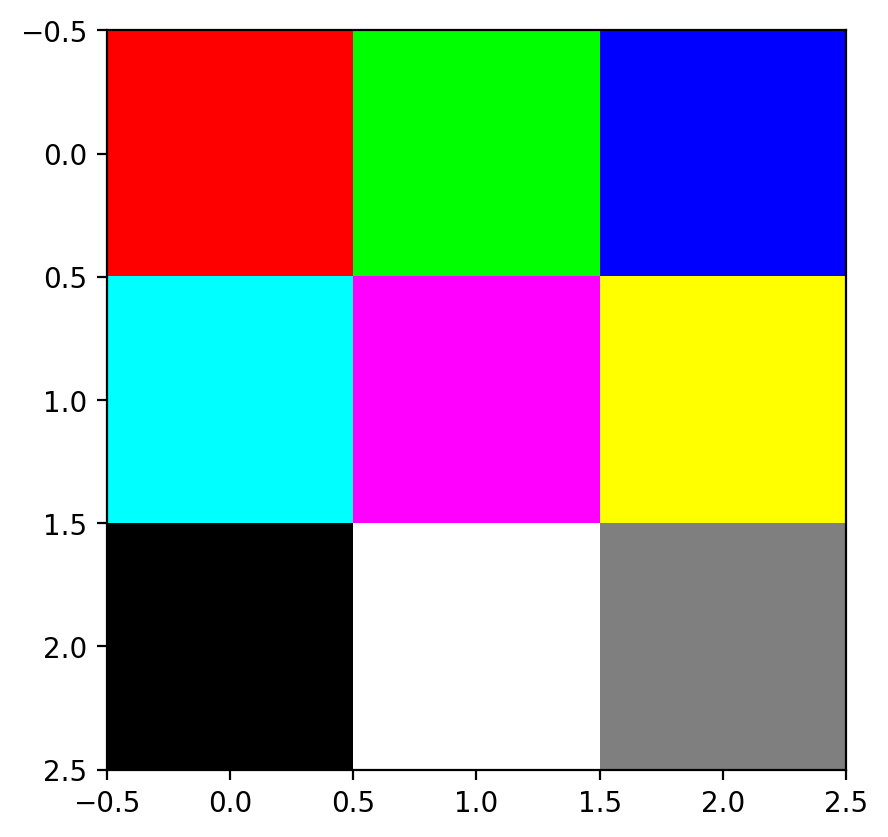

In [8]:
# Let's display the whole image
plt.imshow(img3)

# Image File Management

Opening image files and saving images into files are the start and finish of image processing, and there are several subtleties you must be aware of.

Let's handle some image files. 

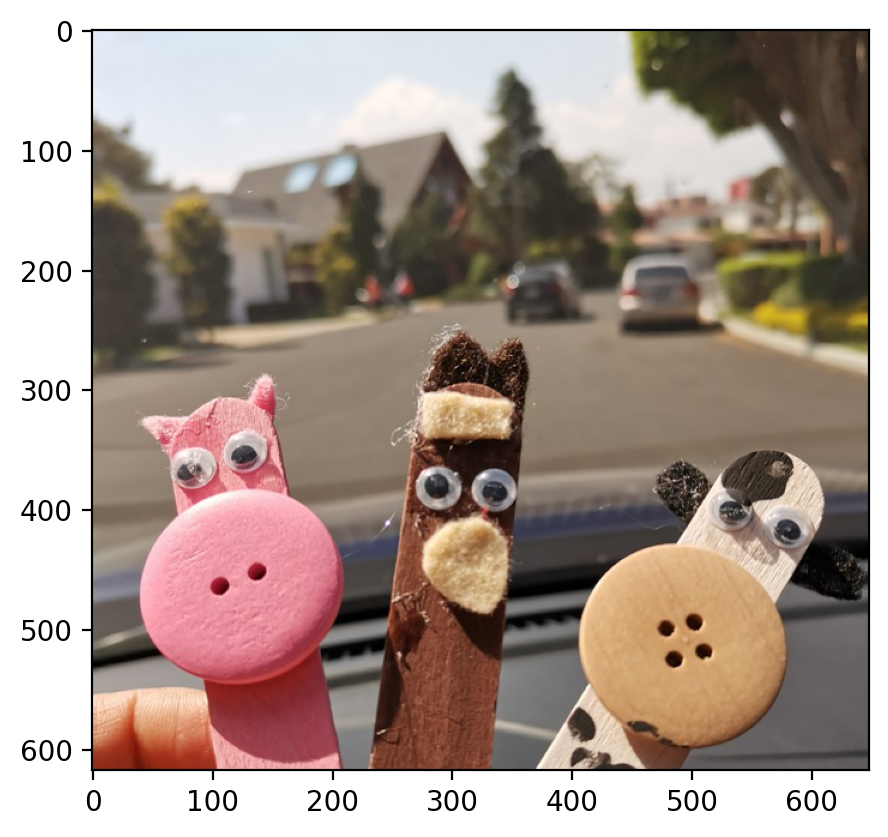

In [9]:
# Let's open a JPEG image file using the pyplot.imread function.

jpeg = plt.imread('stickanimals.jpg')
plt.imshow(jpeg)

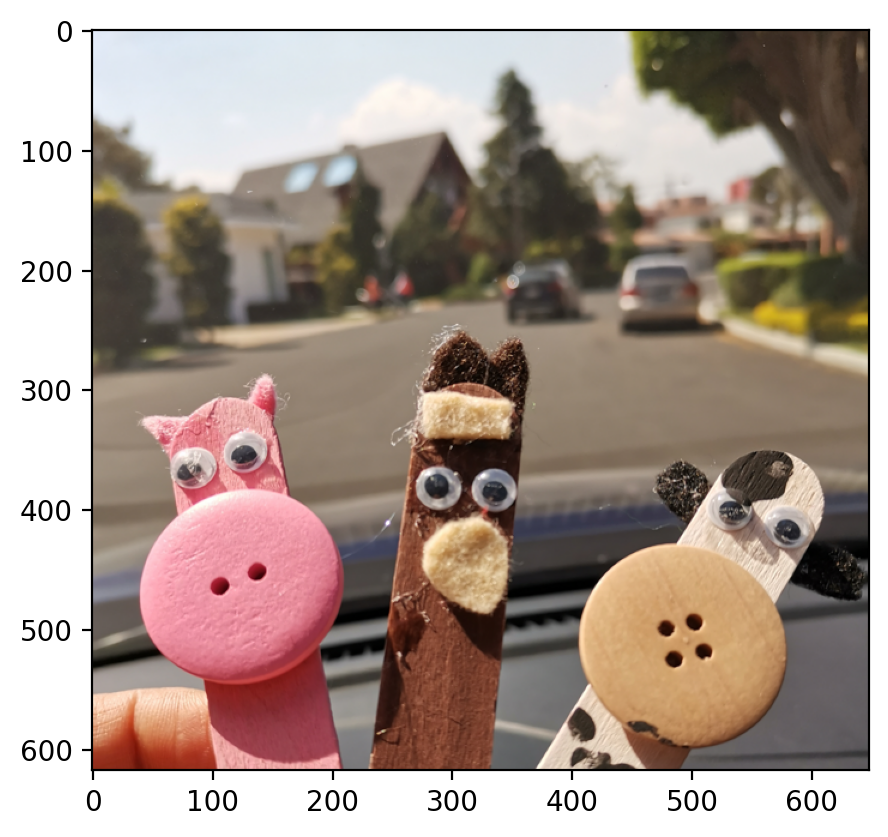

In [10]:
# Now let's open an equivalent PNG image file

png = plt.imread('stickanimalsRGBA.png')
plt.imshow(png)

In [11]:
# Let's see their dimensions

print(np.shape(jpeg))
print(np.shape(png))


(617, 648, 3)
(617, 648, 4)


In [12]:
# Let's see their upper left pixel

print(jpeg[0,0])
print(png[0,0])

[230 238 251]
[0.9019608  0.93333334 0.9882353  1.        ]


In [13]:
# Now let's see their data type

print('JPEG image type: ', type(jpeg[0,0,0]))
print('PNG image type: ', type(png[0,0,0]))


JPEG image type:  <class 'numpy.uint8'>
PNG image type:  <class 'numpy.float32'>


In [14]:
# To convert an RGBA image array that represents data with floating 
# point numbers from 0 to 1 into the RGB integer format from 0 to 255, 
# we need to change 4 things:

# 1) Get rid of the A channel
# 2) Multiply by 255
# 3) Round the resulting values
# 4) Ensure values are between 0 and 255
# 5) Convert data to 8-bit integers

# Let's define a function for this:

def adapt_PNG(the_PNG):
    the_PNG = the_PNG[:,:,:3]      # Step 1
    the_PNG = the_PNG * 255        # Step 2
    the_PNG = adapt_image(the_PNG) # Steps 3, 4, 5
    return the_PNG


# The following function will be useful to perform steps 3, 4, and 5 
# for RGB images in the 0-255 range, which are undergoing operations 
# that may result in floating point numbers.

def adapt_image(the_img):
    return np.uint8(np.clip(the_img.round(),0,255)) # Steps 3, 4, 5



PNG image data type:  <class 'numpy.uint8'>
[230 238 252]


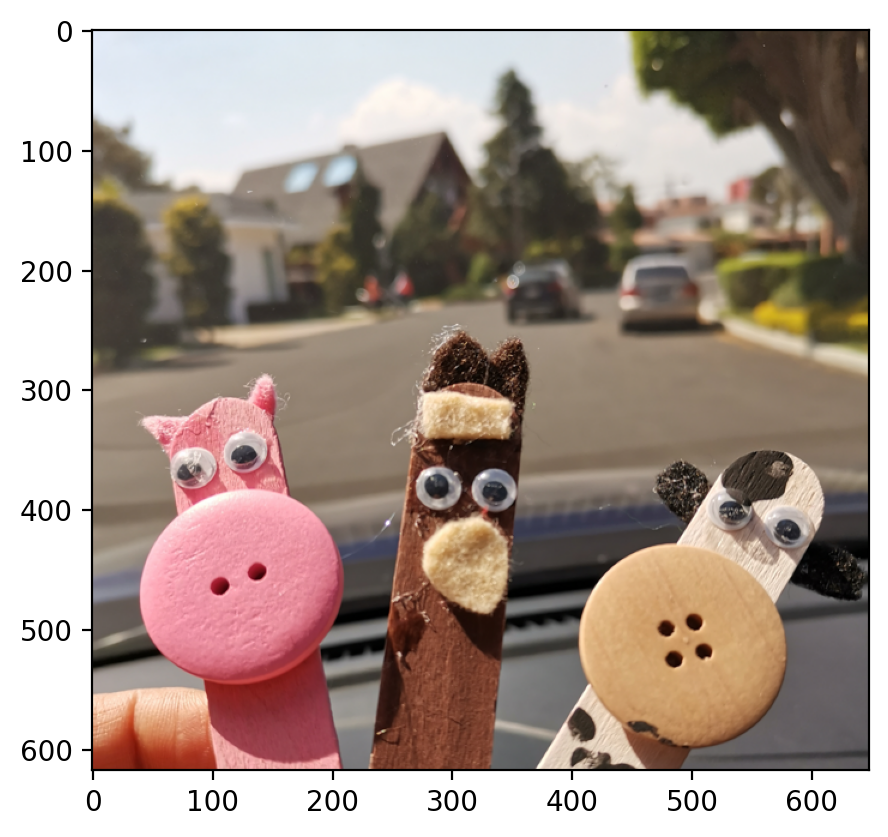

In [15]:
# So from now on, when opening PNG files for these exercises, 
# you may use the adapt_PNG function from EC_CV like this:

from EC_CV import *

img = adapt_PNG(plt.imread("stickanimalsRGBA.png"))

print('PNG image data type: ', type(img[0,0,0]))
print(img[0,0])
plt.imshow(img)

In [16]:
# Lastly, let's save a file.
# This time let's extract the horse as a subarray.

horsie = img[250:600,200:400,:]
plt.imsave('horsie.jpg',horsie)

# Resolution

The resolution of an image is its level of detail, or in other words, its pixel density.
The same picture can be created as a 60 x 40, a 300 x 200, or a 600 x 400 pixel array.
A bigger image is suitable for printing on a larger area, but it requires more computational power to process.

Let's see the same image at several resolutions. 

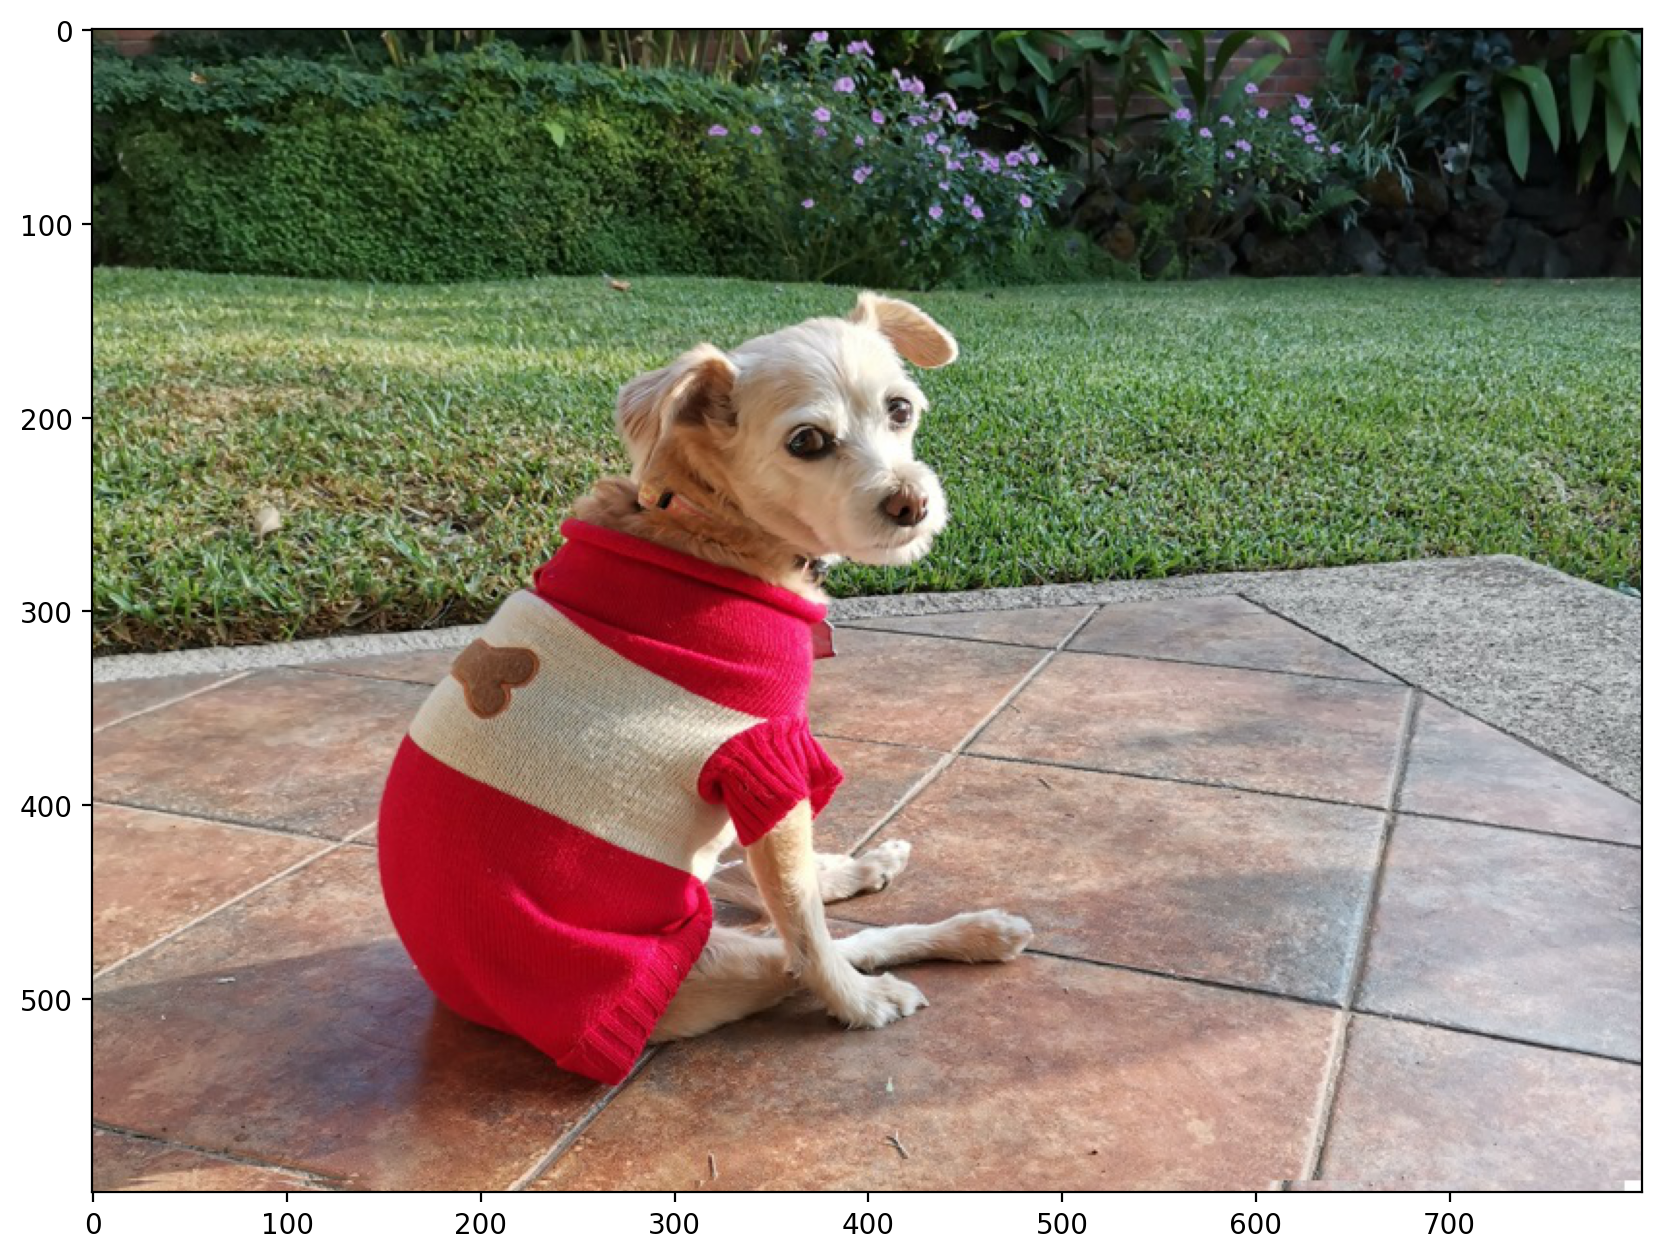

In [17]:
# Let's open 3 JPEG image files with different resolutions 
from matplotlib import rcParams

plt.rcParams['figure.figsize'] = (10, 8) # (Width, Height) supposedly in inches

img1 = plt.imread('dog800x600.jpg')

plt.imshow(img1)

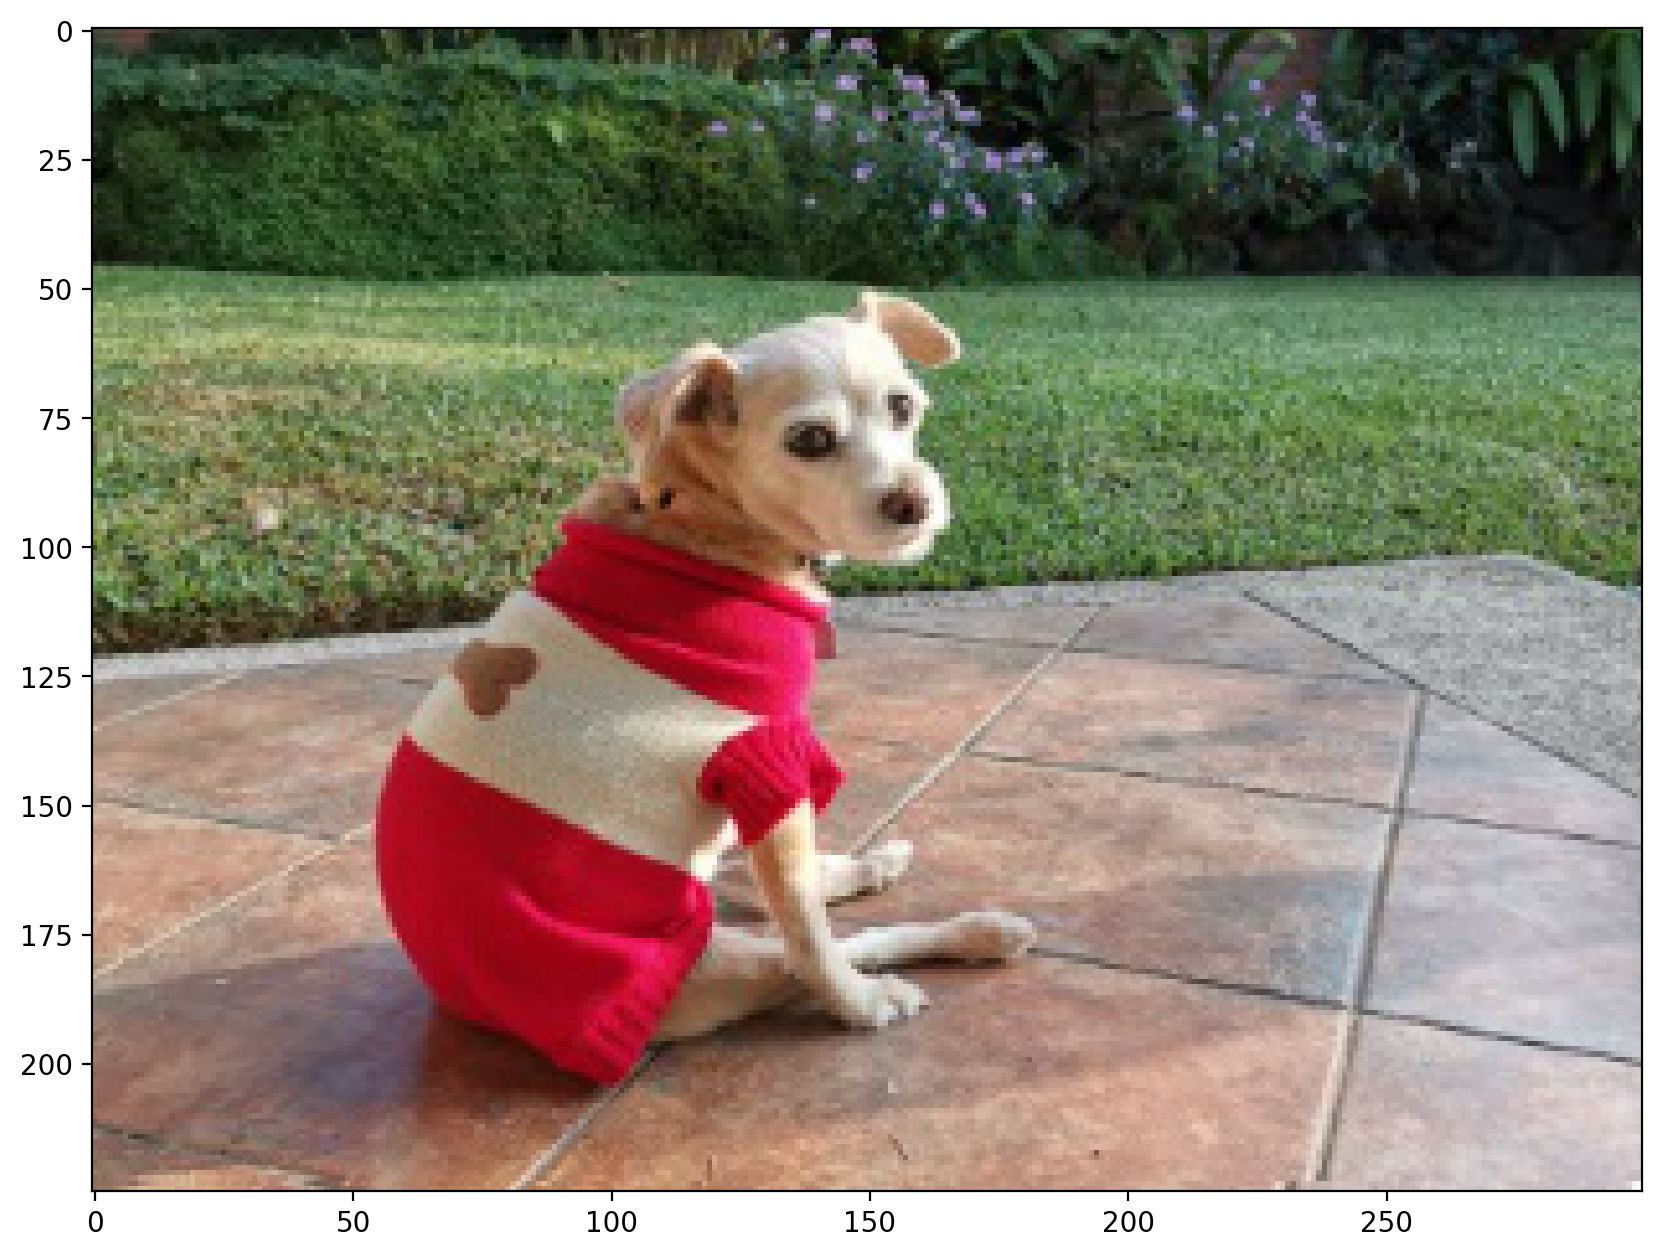

In [18]:
img2 = plt.imread('dog300x225.jpg')
plt.imshow(img2)

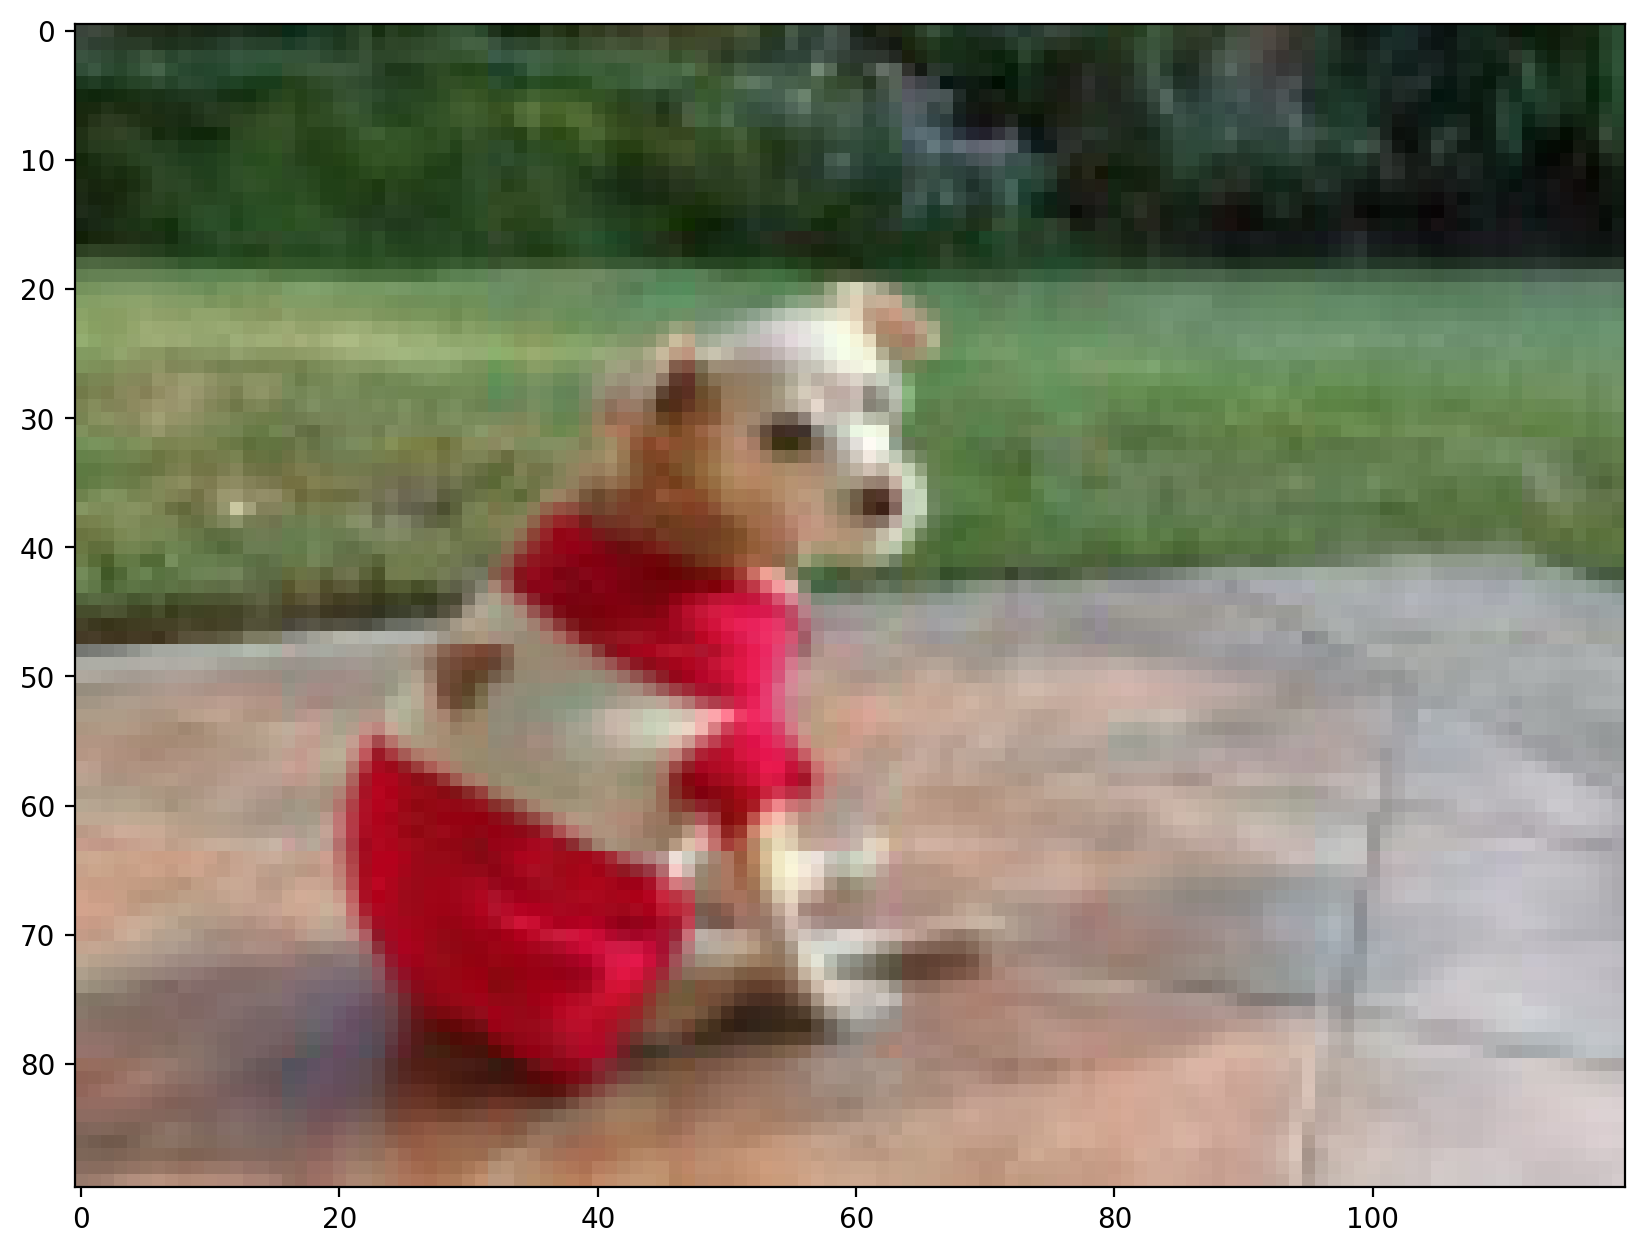

In [19]:
img3 = plt.imread('dog120x90.jpg')
plt.imshow(img3)

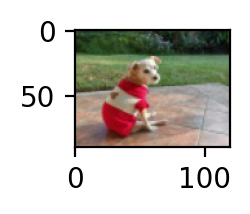

In [20]:
plt.rcParams['figure.figsize'] = (1, 1) # (Width, Height) supposedly in inches
plt.imshow(img3)

# Rotations and Flips

Rotating images at right angles involves transposing the rows and columns, and sometimes inverting the order of the pixels in the rows or columns.

Flips only involve inverting the order of pixels in rows or columns.

NumPy supports these operations for images, rotating and flipping pixels, without changing the order of the pixel data (RGB).

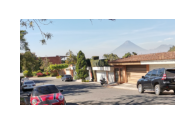

In [21]:
# Let's open a picture and display it without the axes

img = plt.imread('street.jpg')
plt.axis("off")
plt.imshow(img)

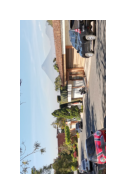

In [22]:
# Now let's rotate it 90 degrees counter clockwise

img = np.rot90(img,1)
plt.axis("off")
plt.imshow(img)

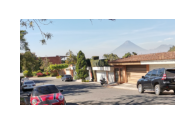

In [23]:
# Now let's rotate it 90 degrees 3 times at once

img = np.rot90(img,3)
plt.axis("off")
plt.imshow(img)

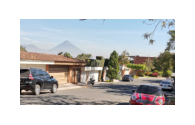

In [24]:
# Let's perform a horizontal flip (invert left and right).
# This is how you would see the image reflected in a mirror.

img = np.fliplr(img)
plt.axis("off")
plt.imshow(img)

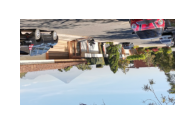

In [25]:
# Now let's try a vertical flip (invert up and down)

img = np.flipud(img)
plt.axis("off")
plt.imshow(img)

# Manipulate Some Pictures


In [26]:
# Run this cell to open 3 images.
# Don't modify this cell you will know later (why?)

from EC_CV import *

# We'll work with 1 JPEG and 2 PNGs
traffic  = plt.imread('traffic.jpg')
penguins = plt.imread('penguins.png')
icepops  = plt.imread('icepops.png')


In [27]:
# let's find the RGBA file

# One of these images is a JPEG file, and the other two are PNGs. 
# One of the PNGs is encoded as RGB, and the other as RGBA.
# Identify the PNG file that's encoded as RGBA.
# You may do this any way you want: Get the dimensions, print a pixel, etc.

print(np.shape(traffic))
print(np.shape(penguins))
print(np.shape(icepops))


(853, 1293, 3)
(729, 1076, 4)
(340, 555, 3)


In [28]:
# Let's Convert the images to an 8-bit unsigned integer RGB encoding

# Depending on each image, the type of its values may be a floating-point 
# number or an integer. 
# Since we want to work with 8-bit RGB, we need to make sure all our
# arrays are encoded that way.



penguins = adapt_PNG(penguins)
icepops  = adapt_image(icepops*255) # Could've used adapt_PNG()

print(np.shape(traffic))
print(type(traffic[0,0,0]))
print(np.shape(penguins))
print(type(penguins[0,0,0]))
print(np.shape(icepops))
print(type(icepops[0,0,0]))


(853, 1293, 3)
<class 'numpy.uint8'>
(729, 1076, 3)
<class 'numpy.uint8'>
(340, 555, 3)
<class 'numpy.uint8'>


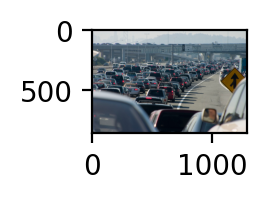

In [29]:
plt.imshow(traffic)

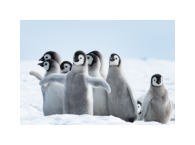

In [30]:
plt.axis('off')
plt.imshow(penguins)


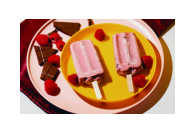

In [31]:
plt.axis('off')
plt.imshow(icepops)

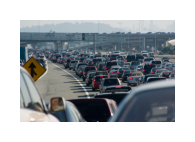

In [32]:
# In this cell, flip traffic horizontally (mirror image)
# and display the resulting image

traffic = np.fliplr(traffic)
plt.axis('off')
plt.imshow(traffic)

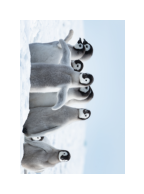

In [33]:
# rotating penguins 90 degrees clockwise
# and display the resulting image.
# This rotation means -90 degrees, or +270 degrees.

penguins = np.rot90(penguins,3)
plt.axis('off')
plt.imshow(penguins)

In [34]:
# Lastly, let's multiply icepops by 2
# 
# Don't modify this cell, just run it. 
# Then, run the next cell 8 times.

# If you lose count, or you need to run the experiment again, 
# you may rerun this cell to reset img to icepops.

img = icepops

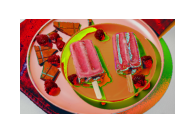

In [35]:
# Run this cell 10 times and see what happens each time.
# Don't modify this cell, just run it. 

img *= 2 
plt.axis('off')
plt.imshow(img)